# Amenity Detection and inventory Tracking Using Detectron2
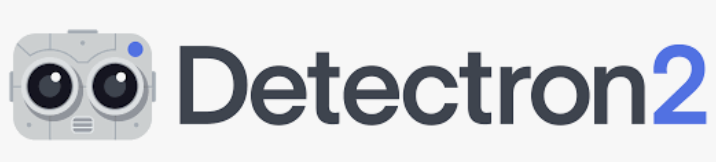

# System Set up



In [ ]:
import sys, os, distutils.core
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Check GPU, First Go to Runtime, Change runtime Type, and change it to GPU
!nvidia-smi

Sat Nov  4 01:42:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    44W / 350W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install Pytorch and Detectron2

In [ ]:
!pip install pyyaml==6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
!pip install torch==1.13.0+cu116 torchvision==0.14.1+cu116 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 999.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 45.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install torch==1.13.0+cu116 and torchvision==0.14.1+cu116 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested torch==1.13.0+cu116
    torchvision 0.14.1+cu116 depends on torch==1.13.1

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
! python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-2y6cja3k
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-2y6cja3k
  Resolved https://github.com/facebookresearch/detectron2.git to commit 337ca3490fa7879ceeeadf6c2b73d67504ff4b4f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6118216 sha256=09ec85580ecf5f8868fd03926a06

# Import Libraries

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


In [ ]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np
import json
import random
import matplotlib.pyplot as plt
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog




## Upload Dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2OsTOLKc6WoGIISlKkST")
project = rf.workspace("sjsu-ri0ao").project("new-vky75")
dataset = project.version(1).download("coco-segmentation")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existin

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to new-1 in coco-segmentation:: 100%|██████████| 6522/6522 [00:01<00:00, 3509.58it/s]


In [ ]:
DATA_SET_NAME = dataset.name.replace(" ","-")
ANNOTATION_FILE_NAME = "_annotations.coco.json"
DATASET_LOCATION = dataset.location

## Registering Data

In [ ]:
from detectron2.data.datasets import register_coco_instances
#Train set
TRAIN_DATA_SET_NAME = f"{DATA_SET_NAME}-train"
TRAIN_DATA_SET_IMAGES_DIR_PATH = os.path.join(DATASET_LOCATION,"train")
TRAIN_DATA_SET_ANN_FILE_PATH = os.path.join(DATASET_LOCATION,"train",ANNOTATION_FILE_NAME)

register_coco_instances(
    name = TRAIN_DATA_SET_NAME,
    metadata ={},
    json_file = TRAIN_DATA_SET_ANN_FILE_PATH,
    image_root = TRAIN_DATA_SET_IMAGES_DIR_PATH
)

#Test set
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"
TEST_DATA_SET_IMAGES_DIR_PATH = os.path.join(DATASET_LOCATION,"test")
TEST_DATA_SET_ANN_FILE_PATH = os.path.join(DATASET_LOCATION,"test",ANNOTATION_FILE_NAME)

register_coco_instances(
    name = TEST_DATA_SET_NAME,
    metadata ={},
    json_file = TEST_DATA_SET_ANN_FILE_PATH,
    image_root = TEST_DATA_SET_IMAGES_DIR_PATH
)

#Valid set
VALID_DATA_SET_NAME = f"{DATA_SET_NAME}-valid"
VALID_DATA_SET_IMAGES_DIR_PATH = os.path.join(DATASET_LOCATION,"valid")
VALID_DATA_SET_ANN_FILE_PATH = os.path.join(DATASET_LOCATION,"valid",ANNOTATION_FILE_NAME)

register_coco_instances(
    name = VALID_DATA_SET_NAME,
    metadata ={},
    json_file = VALID_DATA_SET_ANN_FILE_PATH,
    image_root = VALID_DATA_SET_IMAGES_DIR_PATH
)

In [ ]:
[data_set for data_set in MetadataCatalog.list() if data_set.startswith(DATA_SET_NAME)]

['new-train', 'new-test', 'new-valid']

Visualize data if registered properly

WARNING [11/04 01:49:07 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/04 01:49:07 d2.data.datasets.coco]: Loaded 5689 images in COCO format from /content/new-1/train/_annotations.coco.json


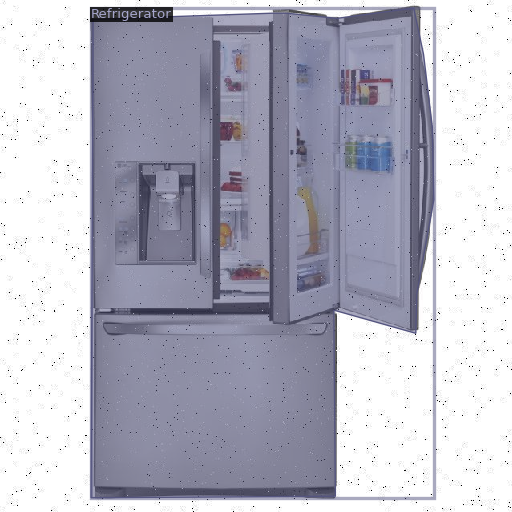

In [ ]:
from detectron2.utils.visualizer import Visualizer
metadata = MetadataCatalog.get(TRAIN_DATA_SET_NAME)
dataset_train = DatasetCatalog.get(TRAIN_DATA_SET_NAME)

dataset_entry = dataset_train[1000]
image= cv2.imread(dataset_entry["file_name"])

v = Visualizer(image[:, :, ::-1], metadata, scale=0.8)

out = v.draw_dataset_dict(dataset_entry)
cv2_imshow(out.get_image()[:, :, ::-1])


# Training

In [ ]:

from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from datetime import datetime

In [ ]:
ARCHITECTURE = "retinanet_R_101_FPN_3x"
CONFIG_FILE_PATH = f"COCO-Detection/{ARCHITECTURE}.yaml"
MAX_ITER = 20000 ### was 10000
EVAL_PAERIO = 100
CHECKPOINT_PERIOD = 500
BASE_LR = 0.001  #0.00025
NUM_CLASSES = 33 ####

OUTPUT_DIR_PATH = os.path.join(DATA_SET_NAME, ARCHITECTURE, datetime.now().strftime('%Y-$m-%d-%H-$M-%S'))

os.makedirs(OUTPUT_DIR_PATH, exist_ok = True)

In [ ]:
cfg= get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.MODEL_WEIGHTS = model_zoo.get_checkpoint_url (CONFIG_FILE_PATH)

cfg.DATASETS.TRAIN= (TRAIN_DATA_SET_NAME,)
cfg.DATASETS.VAL = (VALID_DATA_SET_NAME,)
cfg.DATASETS.TEST = ()

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32
cfg.TEST.EVAL_PERIOD = EVAL_PAERIO
cfg.SOLVER.CHECKPOINT_PERIOD = CHECKPOINT_PERIOD
cfg.DATALOADER.NUM_WORKERS = 2

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.SOLVER.BASE_LR = BASE_LR

cfg.SOLVER.MAX_ITER = MAX_ITER

cfg.MODEL.ROI_HEADS.NUM_CLASSES= NUM_CLASSES
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

cfg.OUTPUT_DIR = OUTPUT_DIR_PATH

## **Create Loss Function for Train vs. Validation**

In [ ]:
from detectron2.engine import HookBase
from detectron2.data import build_detection_train_loader
import detectron2.utils.comm as comm



class ValidationLoss(HookBase):
    def __init__(self, cfg):
        super().__init__()
        self.cfg = cfg.clone()
        self.cfg.DATASETS.TRAIN = cfg.DATASETS.VAL
        self._loader = iter(build_detection_train_loader(self.cfg))

    def after_step(self):
        data = next(self._loader)
        with torch.no_grad():
            loss_dict = self.trainer.model(data)

            losses = sum(loss_dict.values())
            assert torch.isfinite(losses).all(), loss_dict

            loss_dict_reduced = {"val_" + k: v.item() for k, v in
                                 comm.reduce_dict(loss_dict).items()}
            losses_reduced = sum(loss for loss in loss_dict_reduced.values())
            if comm.is_main_process():
                self.trainer.storage.put_scalars(total_val_loss=losses_reduced,
                                                 **loss_dict_reduced)

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
val_loss = ValidationLoss(cfg)
trainer.register_hooks([val_loss])
# swap the order of PeriodicWriter and ValidationLoss
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]
trainer.resume_or_load(resume=False)
trainer.train()



[11/04 02:25:00 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
backbone.top_block.p6.{bias, weight}
backbone.top_block.p7.{bias, weight}
head.bbox_pred.{bias, weight}
head.bbox_subnet.0.{bias, weight}
head.bbox_subnet.2.{bias, weight}
head.bbox_subnet.4.{bias, weight}
head.bbox_subnet.6.{bias, weight}
head.cls_score.{bias, weight}
head.cls_subnet.0.{bias, weight}
head.cls_subnet.2.{bias, weight}
head.cls_subnet.4.{bias, weight}
head.cls_subnet.6.{bias, weight}
  fc1000.{bias, weight}


[11/04 02:25:01 d2.engine.train_loop]: Starting training from iteration 0
[11/04 02:25:04 d2.utils.events]:  eta: 0:30:00  iter: 19  total_loss: 1.956  loss_cls: 1.238  loss_box_reg: 0.7198  total_val_loss: 1.432  val_loss_cls: 0.9375  val_loss_box_reg: 0.4946    time: 0.0905  last_time: 0.0832  data_time: 0.0101  last_data_time: 0.0042   lr: 1.9981e-05  max_mem: 3257M
[11/04 02:25:06 d2.utils.events]:  eta: 0:30:42  iter: 39  total_loss: 2.51  loss_cls: 1.618  loss_box_reg: 0.8912  total_val_loss: 1.343  val_loss_cls: 0.8879  val_loss_box_reg: 0.4548    time: 0.0928  last_time: 0.0951  data_time: 0.0040  last_data_time: 0.0039   lr: 3.9961e-05  max_mem: 3257M
[11/04 02:25:09 d2.utils.events]:  eta: 0:30:58  iter: 59  total_loss: 2.065  loss_cls: 1.338  loss_box_reg: 0.727  total_val_loss: 1.366  val_loss_cls: 0.8594  val_loss_box_reg: 0.4728    time: 0.0922  last_time: 0.0944  data_time: 0.0041  last_data_time: 0.0041   lr: 5.9941e-05  max_mem: 3260M
[11/04 02:25:12 d2.utils.events]: 

##  Plot Train vs. Validation

In [ ]:
import torch
from detectron2.engine import DefaultPredictor



model_name = 'detectron2_model_20000iter.pth'
path = '/content/gdrive/My Drive/retinanet/NEW TRY/nov 3/retinanet_20000.pth'

torch.save(trainer.model.state_dict(), path)


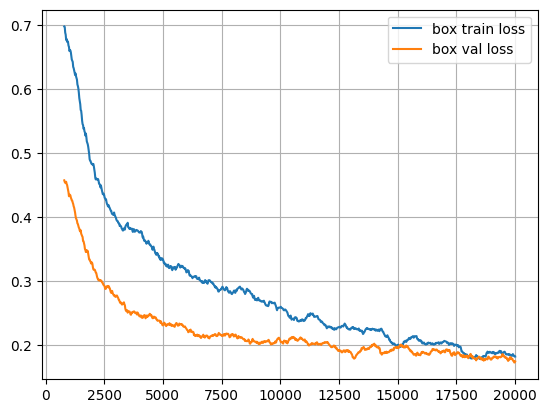

In [ ]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = OUTPUT_DIR_PATH+'/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['loss_box_reg']) for v in metrics if 'loss_box_reg' in v.keys()]
val_loss = [float(v['val_loss_box_reg']) for v in metrics if 'val_loss_box_reg' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='box train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='box val loss')
plt.legend()
plt.grid()
plt.show()

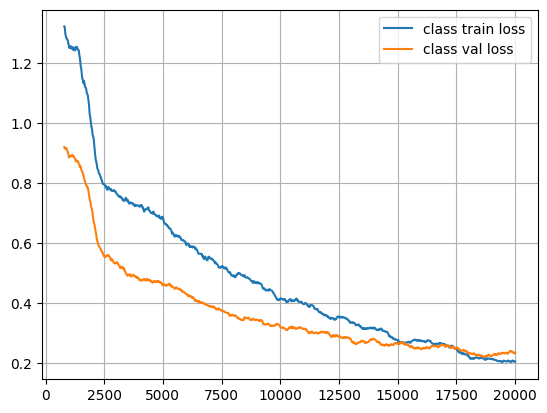

In [ ]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = OUTPUT_DIR_PATH+'/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['loss_cls']) for v in metrics if 'loss_cls' in v.keys()]
val_loss = [float(v['val_loss_cls']) for v in metrics if 'val_loss_cls' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='class train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='class val loss')
plt.legend()
plt.grid()
plt.show()

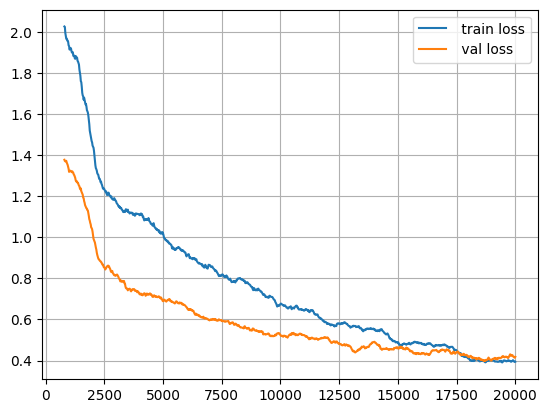

In [ ]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = OUTPUT_DIR_PATH+'/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['total_loss']) for v in metrics if 'total_loss' in v.keys()]
val_loss = [float(v['total_val_loss']) for v in metrics if 'total_val_loss' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label=' train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label=' val loss')
plt.legend()
plt.grid()
plt.show()

## Evaluation

In [ ]:
torch.save(trainer.state_dict(), "model_final.pth")
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75


In [ ]:
predictor = DefaultPredictor(cfg)

[11/04 03:11:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from new/retinanet_R_101_FPN_3x/2023-$m-04-02-$M-40/model_final.pth ...


In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_valid = DatasetCatalog.get(TEST_DATA_SET_NAME)
for d in random.sample(dataset_valid, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get(TRAIN_DATA_SET_NAME),
                   scale=0.5,
                   instance_mode= ColorMode.IMAGE_BW
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(TEST_DATA_SET_NAME, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, TEST_DATA_SET_NAME)
print(inference_on_dataset(predictor.model, val_loader, evaluator))


WARNING [11/04 03:11:13 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/04 03:11:13 d2.data.datasets.coco]: Loaded 279 images in COCO format from /content/new-1/test/_annotations.coco.json
[11/04 03:11:13 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/04 03:11:13 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/04 03:11:13 d2.data.common]: Serializing 279 elements to byte tensors and concatenating them all ...
[11/04 03:11:13 d2.data.common]: Serialized dataset takes 0.19 MiB
[11/04 03:11:13 d2.evaluation.evaluator]: Start inference on 279 batches
[11/04 03:11:13 d2.evaluation.evaluator]: Inference done 11/279. Dataloading: 0.0009 s/iter. Inference: 0.0304 s/iter. Eval: 0.0003 s/iter. Total: 0.0316 s/iter. ETA=0:00:08
[11/04 03:11:18 d2.evalua